In [251]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import TensorBoard
import sys
from tensorflow.keras.layers import Dropout
from matplotlib import pyplot as plt

In [11]:
df = pd.read_csv("heart.csv")

In [12]:
X = df.drop(["output","fbs","restecg"],axis=1)
y = df["output"]

In [201]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [25]:
def custom_nn(hidden_layer_nodes,activations,dropout_nodes ,epoch_num,output_act,batch_size):
    save_loc = os.getcwd()+"\\save\\"
    
    hidden_layers = len(hidden_layer_nodes)

    if hidden_layers != len(dropout_nodes):
        print("Parameter Mismatch : hidden_layers and dropout_nodes length does not match")
        print("Add 0 to not use dropout")
        sys.exit(1)
    
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten())
    
    for i in range(hidden_layers):
        model.add(keras.layers.Dense(hidden_layer_nodes[i], activation = activations[i],
                                    kernel_initializer=tf.keras.initializers.HeNormal(seed=0)))
        if dropout_nodes[i] != 0:
            model.add(keras.layers.Dropout(dropout_nodes[i]))
          
    model.add(keras.layers.Dense(len(y.value_counts()), activation = output_act))
    
    model_name = "{}-dense_{}-nodes_{}-drop_{}-act_{}-outact_{}-epoch_{}-batch".format(hidden_layers,hidden_layer_nodes,
                                                                    dropout_nodes,activations,output_act,epoch_num,batch_size)
    
    if os.path.isdir(save_loc+model_name):
        model_name = model_name + str(int(time.time()))
    
    tensorboard = TensorBoard(log_dir="logs/{}".format(model_name))
    
    model.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "adam",
             metrics = ["accuracy"])
    
    model.fit(X_train, y_train,batch_size=batch_size, validation_data = (X_test, y_test),
              epochs = epoch_num, callbacks =[tensorboard])
    
    print()
    print(model.summary())
    print()
    
    print()
    print('Model Saved-')
    model.save(save_loc+model_name)
    print("Tensorboard event saved as : " + model_name)
    
    return model

tensorboard --logdir logs

model in save
log in logs

In [28]:
model = custom_nn([50,50,200],["relu","relu","sigmoid"],[0,0,0],20,"softmax",32)

Epoch 1/20
8/8 [==============================] - 1s 40ms/step - loss: 0.7509 - accuracy: 0.4917 - val_loss: 0.6314 - val_accuracy: 0.5410
Epoch 2/20
8/8 [==============================] - 0s 5ms/step - loss: 0.6507 - accuracy: 0.5992 - val_loss: 0.6124 - val_accuracy: 0.6721
Epoch 3/20
8/8 [==============================] - 0s 5ms/step - loss: 0.6461 - accuracy: 0.5909 - val_loss: 0.5853 - val_accuracy: 0.7869
Epoch 4/20
8/8 [==============================] - 0s 4ms/step - loss: 0.6343 - accuracy: 0.6488 - val_loss: 0.5867 - val_accuracy: 0.6230
Epoch 5/20
8/8 [==============================] - 0s 5ms/step - loss: 0.6260 - accuracy: 0.6570 - val_loss: 0.5916 - val_accuracy: 0.6557
Epoch 6/20
8/8 [==============================] - 0s 4ms/step - loss: 0.6294 - accuracy: 0.6364 - val_loss: 0.5696 - val_accuracy: 0.7869
Epoch 7/20
8/8 [==============================] - 0s 5ms/step - loss: 0.6219 - accuracy: 0.6570 - val_loss: 0.5693 - val_accuracy: 0.6721
Epoch 8/20
8/8 [=================

In [21]:
model.evaluate(X_train, y_train)
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 998us/step - loss: 0.6078 - accuracy: 0.6721


[0.6078282594680786, 0.6721311211585999]

In [32]:
def custom_nn_no(hidden_layer_nodes,activations,dropout_nodes ,epoch_num,output_act,batch_size):    
    hidden_layers = len(hidden_layer_nodes)

    if hidden_layers != len(dropout_nodes):
        print("Parameter Mismatch : hidden_layers and dropout_nodes length does not match")
        print("Add 0 to not use dropout")
        sys.exit(1)
    
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten())
    
    for i in range(hidden_layers):
        model.add(keras.layers.Dense(hidden_layer_nodes[i], activation = activations[i],
                                    kernel_initializer=tf.keras.initializers.HeNormal(seed=0)))
        if dropout_nodes[i] != 0:
            model.add(keras.layers.Dropout(dropout_nodes[i]))
          
    model.add(keras.layers.Dense(len(y.value_counts()), activation = output_act))
    
#     model_name = "{}-dense_{}-nodes_{}-drop_{}-act_{}-outact_{}-epoch_{}-batch".format(hidden_layers,hidden_layer_nodes,
#                                                                     dropout_nodes,activations,output_act,epoch_num,batch_size)
    
    model.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "adam",
             metrics = ["accuracy"])
    
    model.fit(X_train, y_train,batch_size=batch_size, validation_data = (X_test, y_test),
              epochs = epoch_num)
    
    model.summary()
   
    return model

In [33]:
custom_nn_no([50,50,200],["relu","relu","sigmoid"],[0,0,0],20,"softmax",32)

Epoch 1/20
8/8 [==============================] - 0s 18ms/step - loss: 0.6651 - accuracy: 0.5785 - val_loss: 0.5852 - val_accuracy: 0.7213
Epoch 2/20
8/8 [==============================] - 0s 4ms/step - loss: 0.6394 - accuracy: 0.6281 - val_loss: 0.5965 - val_accuracy: 0.6721
Epoch 3/20
8/8 [==============================] - 0s 4ms/step - loss: 0.6349 - accuracy: 0.6488 - val_loss: 0.5978 - val_accuracy: 0.6721
Epoch 4/20
8/8 [==============================] - 0s 4ms/step - loss: 0.6269 - accuracy: 0.6364 - val_loss: 0.5877 - val_accuracy: 0.7869
Epoch 5/20
8/8 [==============================] - 0s 4ms/step - loss: 0.6257 - accuracy: 0.6777 - val_loss: 0.5876 - val_accuracy: 0.7377
Epoch 6/20
8/8 [==============================] - 0s 4ms/step - loss: 0.6359 - accuracy: 0.6488 - val_loss: 0.5639 - val_accuracy: 0.7377
Epoch 7/20
8/8 [==============================] - 0s 4ms/step - loss: 0.6292 - accuracy: 0.6488 - val_loss: 0.5669 - val_accuracy: 0.7049
Epoch 8/20
8/8 [=================

In [302]:
class CustomNNClassifier:
    def __init__(self,hidden_layer_nodes,activations,dropout_nodes = None ,epoch_num = 20 ,output_act = "softmax",batch_size = 32):
        self.hidden_layer_nodes = hidden_layer_nodes
        self.activations = activations
        self.dropout_nodes = dropout_nodes
        self.epoch_num = epoch_num
        self.output_act = output_act
        self.batch_size = batch_size
        self.hidden_layers = len(self.hidden_layer_nodes)
        
        self.fit_stat =  False
        # hard coded stuff
        initializer = tf.keras.initializers.HeNormal(seed=0)
#         initializer = keras.initializers.glorot_normal(seed=0)
        
        self.kernel_init =  initializer
        self.bias_init = initializer
        #check/fix/process stuff
        self.autoinit()
        self.integrity_check()
        self.build()
        
# other arrtibutes- self.model and self.history
        
    def autoinit(self):
        #dropout
        if self.dropout_nodes == None:
            self.dropout_nodes = self.hidden_layers * [0]
        #dense-activation    
        if type(self.activations) == str:
            self.activations =  self.hidden_layers * [self.activations]       
        elif type(self.activations) == list:
            if self.hidden_layers > 1 and len(self.activations) == 1:
                self.activations = self.hidden_layers * self.activations
        
    def integrity_check(self):
#         if self.hidden_layers != len(self.dropout_nodes): # fixed in autoinit
#             print("Parameter Mismatch : hidden_layers and dropout_nodes length does not match")
#             print("Add 0 to not use dropout")
#             sys.exit(1)
        if self.hidden_layers != len(self.activations):
            print("Parameter Mismatch : hidden_layers and activations length does not match")
            print("To apply the same activation pass a string or a list with only one activation, Example: 'relu' or ['relu']")
            sys.exit(1)
    
    def build(self): # build only the input and hidden layer. the output is in fit
        self.model = keras.models.Sequential()
        self.model.add(keras.layers.Flatten())
    
        for i in range(self.hidden_layers):
            self.model.add(keras.layers.Dense(self.hidden_layer_nodes[i],
                                         activation = self.activations[i],
                                         kernel_initializer= self.kernel_init,
                                         bias_initializer = self.bias_init))
            if self.dropout_nodes[i] != 0:
                self.model.add(keras.layers.Dropout(self.dropout_nodes[i]))

    def details(self):
        model_name = "{}-dense_{}-nodes_{}-drop_{}-act_{}-outact_{}-epoch_{}-batch".format(self.hidden_layers,
                                                                                           self.hidden_layer_nodes,
                                                                                           self.dropout_nodes,
                                                                                           self.activations,
                                                                                           self.output_act,
                                                                                           self.epoch_num,
                                                                                           self.batch_size)
        print("Model Structure : \n" + model_name)
        
        if self.fit_stat == False:
            print("Fit the model to get model summery")
        else:
            self.model.summary()
        
        
    def compile_(self):
        self.model.compile(loss = "sparse_categorical_crossentropy",optimizer = "adam",metrics = ["accuracy"])
    
    def visualize(self):    
        if self.fit_stat == False:
            print("Fit the model to visualize train and test error and accuracy")
        else:
            print("Training:")
            self.model.evaluate(X_train, y_train)
            print("Testing:")
            self.model.evaluate(X_test, y_test)
        
            plt.plot(self.history.history['accuracy'])
            plt.plot(self.history.history['val_accuracy'])
            plt.title('Model Accuracy')
            plt.ylabel('accuracy')
            plt.xlabel('epoch')
            plt.legend(['train', 'test'], loc='upper left')
            plt.show()
        

            plt.plot(self.history.history['loss'])
            plt.plot(self.history.history['val_loss'])
            plt.title('Model Loss')
            plt.ylabel('loss')
            plt.xlabel('epoch')
            plt.legend(['train', 'test'], loc='upper left')
            plt.show()
        
    def fit(self,X_train, X_test, y_train, y_test): # output layer -> compile -> fit
        
        self.model.add(keras.layers.Dense(len(y_train.value_counts()), activation = self.output_act))
        
        self.compile_()
        
        self.history = self.model.fit(X_train, y_train,batch_size= self.batch_size, validation_data = (X_test, y_test),epochs = self.epoch_num)
        self.fit_stat =  True
        
        return self.model

In [307]:
a = CustomNNClassifier([50,50,200],["relu","relu","sigmoid"],[0,0,0],20,"softmax",32)

In [308]:
a.fit(X_train, X_test, y_train, y_test)

Epoch 1/20
8/8 [==============================] - 0s 18ms/step - loss: 0.7000 - accuracy: 0.5165 - val_loss: 0.6272 - val_accuracy: 0.6393
Epoch 2/20
8/8 [==============================] - 0s 4ms/step - loss: 0.6582 - accuracy: 0.6157 - val_loss: 0.6004 - val_accuracy: 0.6721
Epoch 3/20
8/8 [==============================] - 0s 4ms/step - loss: 0.6533 - accuracy: 0.5950 - val_loss: 0.5687 - val_accuracy: 0.7869
Epoch 4/20
8/8 [==============================] - 0s 4ms/step - loss: 0.6173 - accuracy: 0.6529 - val_loss: 0.5700 - val_accuracy: 0.6885
Epoch 5/20
8/8 [==============================] - 0s 4ms/step - loss: 0.6222 - accuracy: 0.6529 - val_loss: 0.5623 - val_accuracy: 0.8033
Epoch 6/20
8/8 [==============================] - 0s 4ms/step - loss: 0.6220 - accuracy: 0.6488 - val_loss: 0.5752 - val_accuracy: 0.7049
Epoch 7/20
8/8 [==============================] - 0s 4ms/step - loss: 0.6178 - accuracy: 0.6529 - val_loss: 0.5758 - val_accuracy: 0.7377
Epoch 8/20
8/8 [=================

In [309]:
a.details()

Model Structure : 
3-dense_[50, 50, 200]-nodes_[0, 0, 0]-drop_['relu', 'relu', 'sigmoid']-act_softmax-outact_20-epoch_32-batch
Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_45 (Flatten)         (None, 11)                0         
_________________________________________________________________
dense_166 (Dense)            (None, 50)                600       
_________________________________________________________________
dense_167 (Dense)            (None, 50)                2550      
_________________________________________________________________
dense_168 (Dense)            (None, 200)               10200     
_________________________________________________________________
dense_169 (Dense)            (None, 2)                 402       
Total params: 13,752
Trainable params: 13,752
Non-trainable params: 0
______________________________________________________

Training:
8/8 [==============================] - 0s 1ms/step - loss: 0.5923 - accuracy: 0.6694
Testing:
2/2 [==============================] - 0s 0s/step - loss: 0.5279 - accuracy: 0.7541


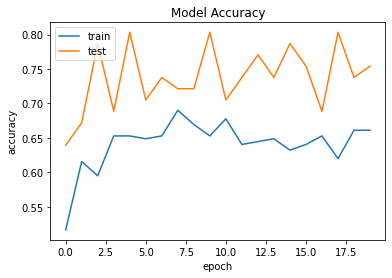

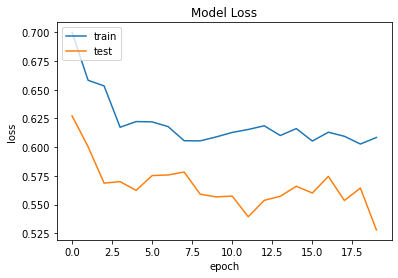

In [311]:
a.visualize()